In [20]:
import sys
import os
sys.path.append(os.path.abspath('../..'))


# from scan_engine.status_fields_config_24summ import STATUS_FIELDS_CONFIG
from status_fields_config_oct3v1_brws_250525 import STATUS_FIELDS_CONFIG

from utlis.scan_engine_utlis.scan_eng_big_utlis import log_folder_to_parquet_sep

if __name__ == "__main__":
    base_folder = "/data/big_rim/rsync_dcc_sum/25juneon" #"/data/big_rim/rsync_dcc_sum/24summ" #"/data/big_rim/rsync_dcc_sum/25Apri_social" #"/data/big_rim/rsync_dcc_sum/Oct3V1" #"/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ"  # Replace with your base folder
    # save_path = os.path.join(base_folder, 'paret')
    failed_paths_file = None #'/data/big_rim/rsync_dcc_sum/Oct3V1/sync_failed_brws.txt'  # File containing failed paths


    force_rescan_rec_files = [
        # ('2023-10-01', '001'),
        # ('2023-10-02', '002'),
        # Add more as needed
    ]
    rescan_threshold_days = 0.00001 # 7 days, but guess if i mess up i can just change it to automatically rescan all, smile... #0.1

    log_folder_to_parquet_sep(base_folder, failed_paths_file, STATUS_FIELDS_CONFIG,
                              force_rescan_rec_files=force_rescan_rec_files,
                              rescan_threshold_days=rescan_threshold_days)


Log for 20250506v1l23l1yellow_pblkconspecific saved at /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250506v1l23l1yellow_pblkconspecific/folder_log.parquet
Log for 20250505v1l23r1pink_pnocapconspecific saved at /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250505v1l23r1pink_pnocapconspecific/folder_log.parquet
Log for 20250506v1l23l1yellow_pnocapconspecific saved at /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250506v1l23l1yellow_pnocapconspecific/folder_log.parquet
Log for 20250407v1l23_2partnersocialpreference saved at /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250407v1l23_2partnersocialpreference/folder_log.parquet
Log for 20250506v1l23l1yellow saved at /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250506v1l23l1yellow/folder_log.parquet
Log for 20250505v1l23r1pink_pblkconspecific saved at /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250505v1l23r1pink_pblkconspecific/folder_log.parquet
Log for 20250505v1l23r1pink_onlybehavior saved at /data/big_rim/rsync_

In [21]:
# sys.path.append(os.path.abspath('../..'))
from utlis.scan_engine_utlis.scan_engine_utlis import read_all_parquet_files
# base_folder = "/data/big_rim/rsync_dcc_sum/Oct3V1" 
all_df = read_all_parquet_files(base_folder)

In [22]:
import pyarrow.compute as pc
from functools import reduce


table = all_df #combined_df
# Filter mir_generate_param == 0 and sync != 3
conditions = [
   pc.equal(table['mir_generate_param'], '0'),
   # pc.equal(table['sync'], '1'),
   # pc.not_equal(table['sync'], '3'),
   # pc.equal(table['com'], '1'),
   # # pc.equal(table['com_vis'], '1'),
   # # pc.equal(table['v1'], '1'),
   # pc.equal(table['dannce'], '1'),
   # pc.equal(table['dannce_vis'], '1'),
   # pc.equal(table['social'], '1'),
   # pc.equal(table['mini_6cam_map'], '1'),
   # pc.equal(table['mini_rec_sync'], '1'),e
   #mini_rec_sync mini_rec_sync_com
   # mini_6cam_map
]

filter_mask = reduce(pc.and_, conditions)



# Apply the filter and print the results
filtered_table = table.filter(filter_mask)

# Print each row of the filtered table
print(filtered_table.to_pandas())  # This will display the filtered data in a familiar pandas-like format


  mir_generate_param sync mini_6cam_map dropf_handle com com_vis social  \
0                  0    0             0            0   0       0      1   
1                  0    0             0            0   0       0      1   
2                  0    0             0            0   0       0      1   
3                  0    0             0            0   0       0      1   
4                  0    0             0            0   0       0      0   
5                  0    0             0            0   0       0      1   
6                  0    0             0            0   0       0      0   
7                  0    0             0            0   0       0      0   
8                  0    0             0            0   0       0      0   

  miniscope test after_oxytocin before_oxytocin dannce dannce_vis  \
0         1    0              0               0      0          0   
1         1    0              0               0      0          0   
2         1    0              0           

In [13]:
# Convert and flatten the ChunkedArray
rec_paths = filtered_table["rec_path"].to_pylist()

# Print each path
for path in rec_paths:
    # Each element is likely a list with one string, e.g., ['/some/path']
    print(path[0] if isinstance(path, list) else path)


/data/big_rim/rsync_dcc_sum/25juneon/2025_06_17/20250407V1L23r1blkcap_econeafterscone
/data/big_rim/rsync_dcc_sum/25juneon/2025_06_17/20250407V1L23r1blkcap
/data/big_rim/rsync_dcc_sum/25juneon/2025_06_17/20250505V1L23R1pink_scone
/data/big_rim/rsync_dcc_sum/25juneon/2025_06_17/20250505V1L23R1pink_econeafterscone
/data/big_rim/rsync_dcc_sum/25juneon/2025_06_17/20250407V1L23r1blkcap_econe
/data/big_rim/rsync_dcc_sum/25juneon/2025_06_26/20250505v1l23r1_ecups
/data/big_rim/rsync_dcc_sum/25juneon/2025_06_26/20250505v1l23r1_greencupsocial2
/data/big_rim/rsync_dcc_sum/25juneon/2025_06_26/20250505v1l23r1_greencupsocial
/data/big_rim/rsync_dcc_sum/25juneon/2025_06_26/20250506v1l23l1_clearsocialcup


In [23]:
from utlis.exe_engine_utlis.comb_all_exe import sequential_process_and_update_mirgenparam

sequential_process_and_update_mirgenparam(filtered_table, base_folder)

Found 6 calibration files.
Frame count: 13800
Processed /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/calib_before/hires_cam1_params.mat
Processed /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/calib_before/hires_cam2_params.mat
Processed /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/calib_before/hires_cam3_params.mat
Processed /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/calib_before/hires_cam4_params.mat
Processed /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/calib_before/hires_cam5_params.mat
Processed /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/calib_before/hires_cam6_params.mat
Data saved to /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250506v1l23l1yellow_pblkconspecific/2025_07_02_20250506v1l23l1yellow_pblkconspecific_calib_before_label3d_dannce.mat
mir_generate_param ran successfully.
Updated Parquet file at /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250506v1l23l1yellow_pblkconspecific/folder_log.parquet with new status.
Found 6 calibration files.
Frame

Processing: /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250506v1l23l1yellow_pblkconspecific


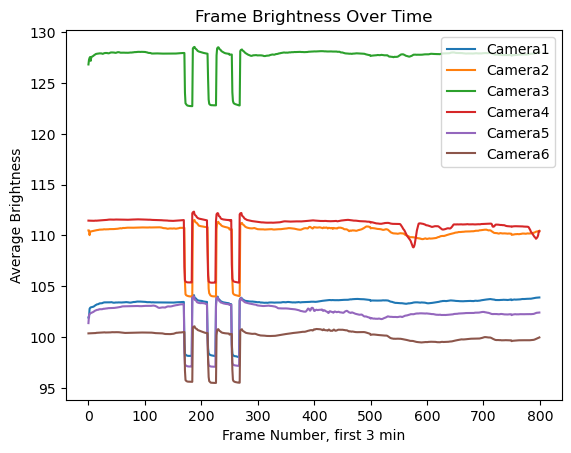

Saved brightness plot to /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250506v1l23l1yellow_pblkconspecific/videos/6cam_sync.png
Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250506v1l23l1yellow_pblkconspecific: {'Camera1': [170, 211, 254], 'Camera2': [171, 212, 213, 255], 'Camera3': [171, 212, 255], 'Camera4': [170, 211, 212, 254], 'Camera5': [170, 211, 254], 'Camera6': [171, 212, 255]}
Processed drop frames: {'Camera1': 170, 'Camera2': 171, 'Camera3': 171, 'Camera4': 170, 'Camera5': 170, 'Camera6': 171}
170
alined data saved to: /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250506v1l23l1yellow_pblkconspecific/df_synced_2025_07_02_20250506v1l23l1yellow_pblkconspecific_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250506v1l23l1yellow_pblkconspecific with /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250506v1l23l1yellow_pblkconspecific/2025_07_02_20250506v1l23l1yellow_pblkconspe

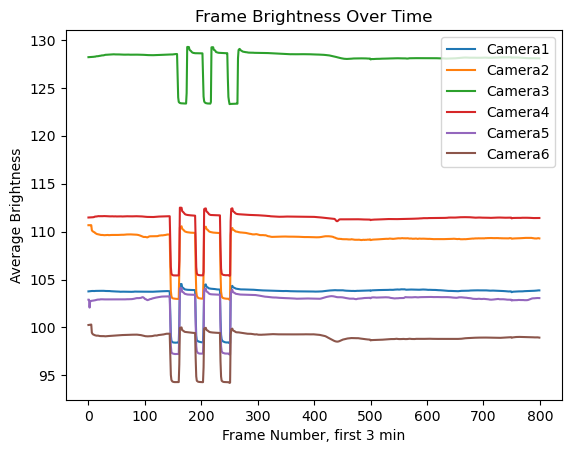

Saved brightness plot to /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250505v1l23r1pink_pnocapconspecific/videos/6cam_sync.png
Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250505v1l23r1pink_pnocapconspecific: {'Camera1': [145, 146, 190, 191, 234], 'Camera2': [145, 146, 190, 191, 234], 'Camera3': [158, 159, 203, 204, 247], 'Camera4': [145, 146, 190, 191, 234, 235], 'Camera5': [145, 146, 190, 191, 234], 'Camera6': [145, 190, 234]}
Processed drop frames: {'Camera1': 146, 'Camera2': 146, 'Camera3': 159, 'Camera4': 146, 'Camera5': 146, 'Camera6': 145}
145
alined data saved to: /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250505v1l23r1pink_pnocapconspecific/df_synced_2025_07_02_20250505v1l23r1pink_pnocapconspecific_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250505v1l23r1pink_pnocapconspecific with /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250505v1l23r1pink_pnocapconspecifi

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x5d010c48db80] moov atom not found


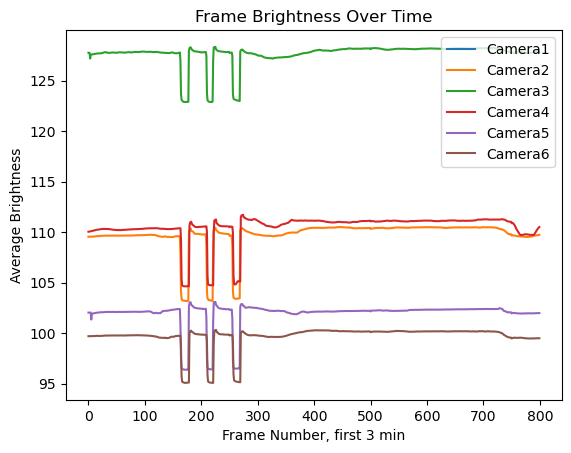

Saved brightness plot to /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250506v1l23l1yellow_pnocapconspecific/videos/6cam_sync.png
Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250506v1l23l1yellow_pnocapconspecific: {'Camera1': [], 'Camera2': [164, 210, 256], 'Camera3': [164, 210, 256], 'Camera4': [165, 211, 257], 'Camera5': [164, 210, 256], 'Camera6': [165, 211, 257]}
Skipping process_calibration_data for /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250506v1l23l1yellow_pnocapconspecific due to missing drop frames
please mannually process /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250506v1l23l1yellow_pnocapconspecific
Failed processing: /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250506v1l23l1yellow_pnocapconspecific, status set to 3.
Updated Parquet file at /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250506v1l23l1yellow_pnocapconspecific/folder_log.parquet with new status.
Processing: /data/big_rim/rsync_dcc_sum/25juneon

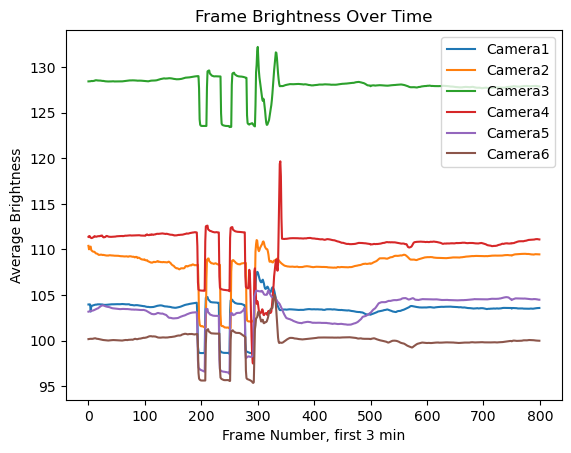

Saved brightness plot to /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250407v1l23_2partnersocialpreference/videos/6cam_sync.png
Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250407v1l23_2partnersocialpreference: {'Camera1': [194, 232, 278], 'Camera2': [195, 196, 234, 280], 'Camera3': [197, 235, 281], 'Camera4': [194, 232, 278, 288, 289, 342, 343], 'Camera5': [194, 232, 278], 'Camera6': [195, 233, 279]}
Processed drop frames: {'Camera1': 194, 'Camera2': 196, 'Camera3': 197, 'Camera4': 194, 'Camera5': 194, 'Camera6': 195}
194
alined data saved to: /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250407v1l23_2partnersocialpreference/df_synced_2025_07_02_20250407v1l23_2partnersocialpreference_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250407v1l23_2partnersocialpreference with /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250407v1l23_2partnersocialpreference/2025_07_02_20250407v1l

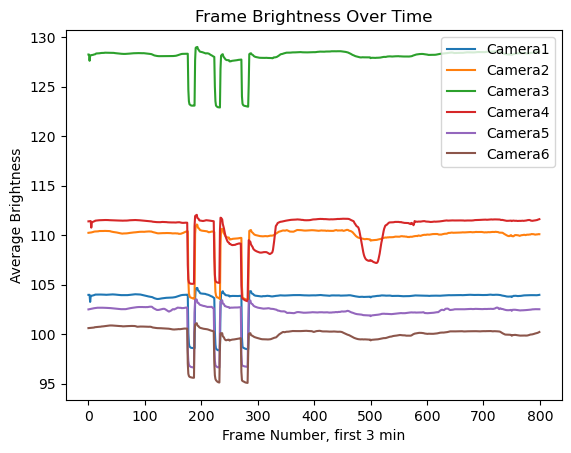

Saved brightness plot to /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250506v1l23l1yellow/videos/6cam_sync.png
Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250506v1l23l1yellow: {'Camera1': [177, 224, 272], 'Camera2': [177, 224, 272], 'Camera3': [177, 224, 272], 'Camera4': [176, 223, 271], 'Camera5': [176, 223, 271], 'Camera6': [176, 223, 271]}
Processed drop frames: {'Camera1': 177, 'Camera2': 177, 'Camera3': 177, 'Camera4': 176, 'Camera5': 176, 'Camera6': 176}
176
alined data saved to: /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250506v1l23l1yellow/df_synced_2025_07_02_20250506v1l23l1yellow_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250506v1l23l1yellow with /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250506v1l23l1yellow/2025_07_02_20250506v1l23l1yellow_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/202505

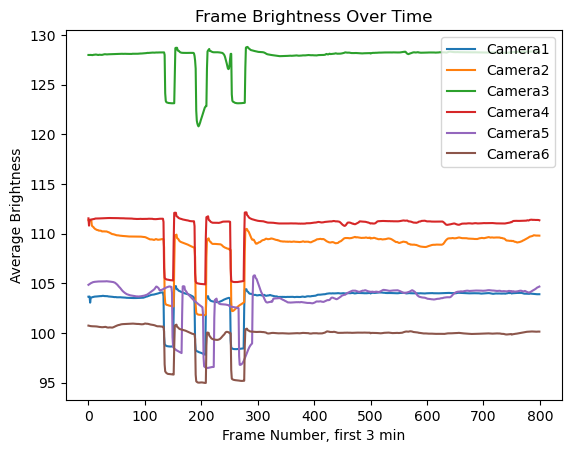

Saved brightness plot to /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250505v1l23r1pink_pblkconspecific/videos/6cam_sync.png
Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250505v1l23r1pink_pblkconspecific: {'Camera1': [134, 189, 252], 'Camera2': [135, 190, 253], 'Camera3': [136, 191, 254], 'Camera4': [134, 189, 252], 'Camera5': [149, 204, 267], 'Camera6': [135, 190, 253]}
Processed drop frames: {'Camera1': 134, 'Camera2': 135, 'Camera3': 136, 'Camera4': 134, 'Camera5': 149, 'Camera6': 135}
134
alined data saved to: /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250505v1l23r1pink_pblkconspecific/df_synced_2025_07_02_20250505v1l23r1pink_pblkconspecific_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250505v1l23r1pink_pblkconspecific with /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250505v1l23r1pink_pblkconspecific/2025_07_02_20250505v1l23r1pink_pblkconspecific_calib_before_label

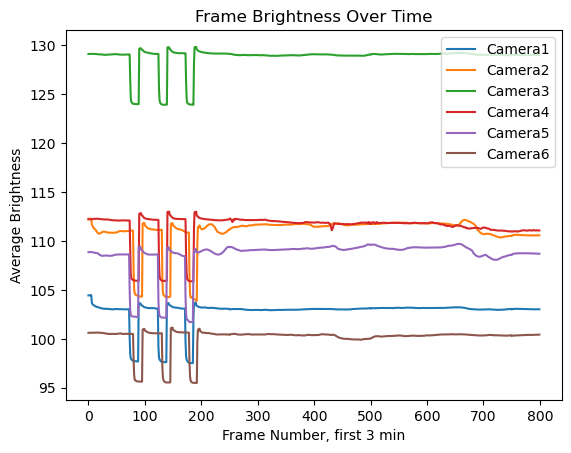

Saved brightness plot to /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250505v1l23r1pink_onlybehavior/videos/6cam_sync.png
Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250505v1l23r1pink_onlybehavior: {'Camera1': [73, 124, 172], 'Camera2': [80, 131, 179], 'Camera3': [74, 125, 173], 'Camera4': [74, 75, 125, 173], 'Camera5': [73, 74, 124, 172], 'Camera6': [80, 131, 179]}
Processed drop frames: {'Camera1': 73, 'Camera2': 80, 'Camera3': 74, 'Camera4': 75, 'Camera5': 74, 'Camera6': 80}
73
alined data saved to: /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250505v1l23r1pink_onlybehavior/df_synced_2025_07_02_20250505v1l23r1pink_onlybehavior_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250505v1l23r1pink_onlybehavior with /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250505v1l23r1pink_onlybehavior/2025_07_02_20250505v1l23r1pink_onlybehavior_calib_before_label3d_dannce.mat 
Moved prior

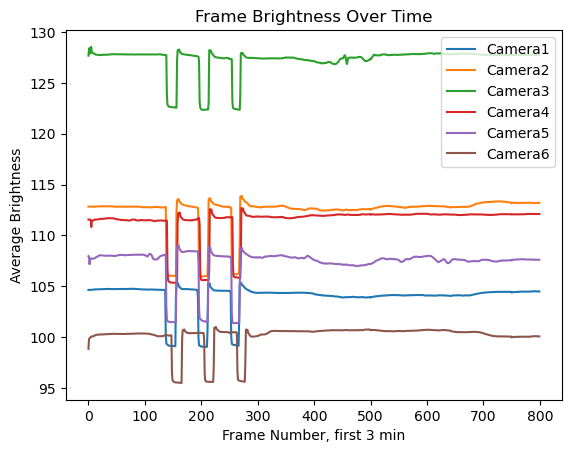

Saved brightness plot to /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250505v1l23r1pink/videos/6cam_sync.png
Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250505v1l23r1pink: {'Camera1': [137, 195, 253], 'Camera2': [138, 196, 254], 'Camera3': [139, 197, 255], 'Camera4': [140, 198, 256], 'Camera5': [138, 196, 254], 'Camera6': [148, 206, 264]}
Processed drop frames: {'Camera1': 137, 'Camera2': 138, 'Camera3': 139, 'Camera4': 140, 'Camera5': 138, 'Camera6': 148}
137
alined data saved to: /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250505v1l23r1pink/df_synced_2025_07_02_20250505v1l23r1pink_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250505v1l23r1pink with /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250505v1l23r1pink/2025_07_02_20250505v1l23r1pink_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250505v1l23r1pink/

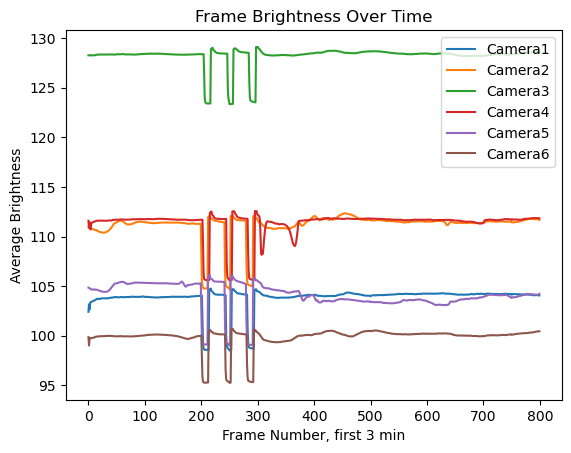

Saved brightness plot to /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250407v1l23/videos/6cam_sync.png
Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250407v1l23: {'Camera1': [202, 203, 244, 282], 'Camera2': [200, 201, 242, 280], 'Camera3': [206, 247, 285], 'Camera4': [203, 204, 245, 283], 'Camera5': [200, 201, 242, 280], 'Camera6': [201, 202, 243, 281]}
Processed drop frames: {'Camera1': 203, 'Camera2': 201, 'Camera3': 206, 'Camera4': 204, 'Camera5': 201, 'Camera6': 202}
201
alined data saved to: /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250407v1l23/df_synced_2025_07_02_20250407v1l23_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250407v1l23 with /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250407v1l23/2025_07_02_20250407v1l23_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/25juneon/2025_07_02/20250407v1l23/2025_07_02_20250407v1l2

In [24]:
from utlis.exe_engine_utlis.comb_all_exe import sequential_process_and_update_sync

sequential_process_and_update_sync(filtered_table, base_folder, max_frames=800) #threshold=2, max_frames=300, min_frame=0

/data/big_rim/rsync_dcc_sum/25juneon/2025_06_24/20250519PMCL23L2_enewcone_econe_oldecone
plotting com_traga for /data/big_rim/rsync_dcc_sum/25juneon/2025_06_24/20250519PMCL23L2_enewcone_econe_oldecone


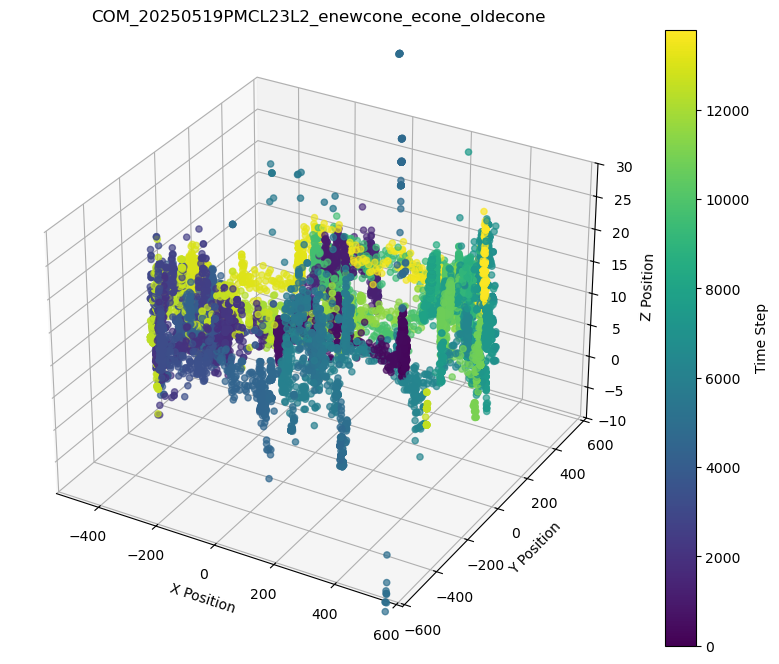

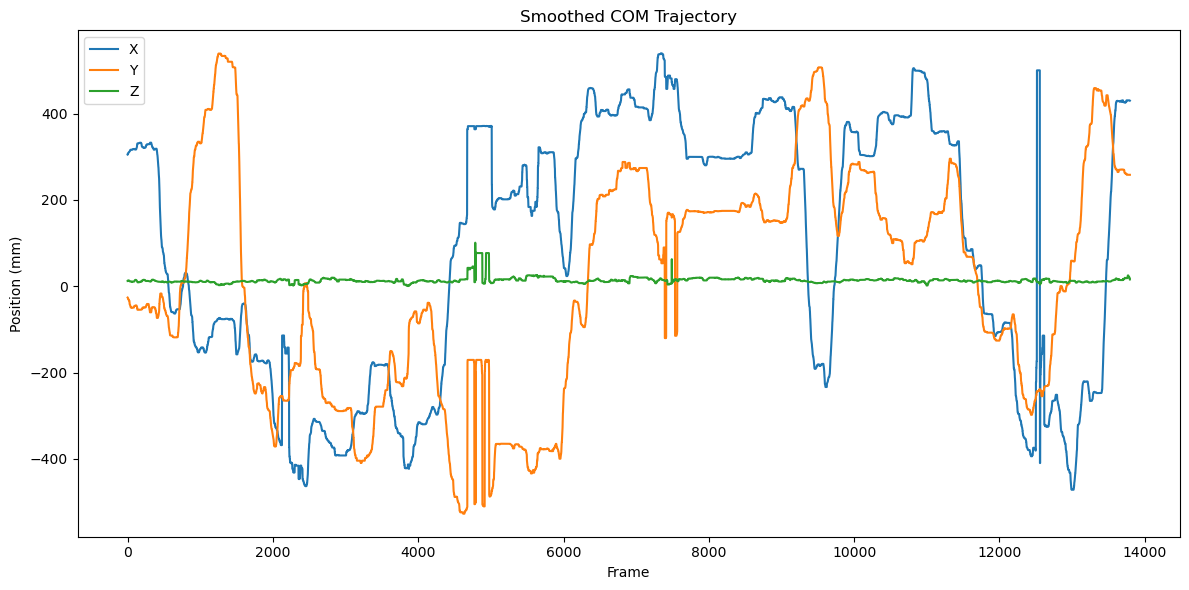

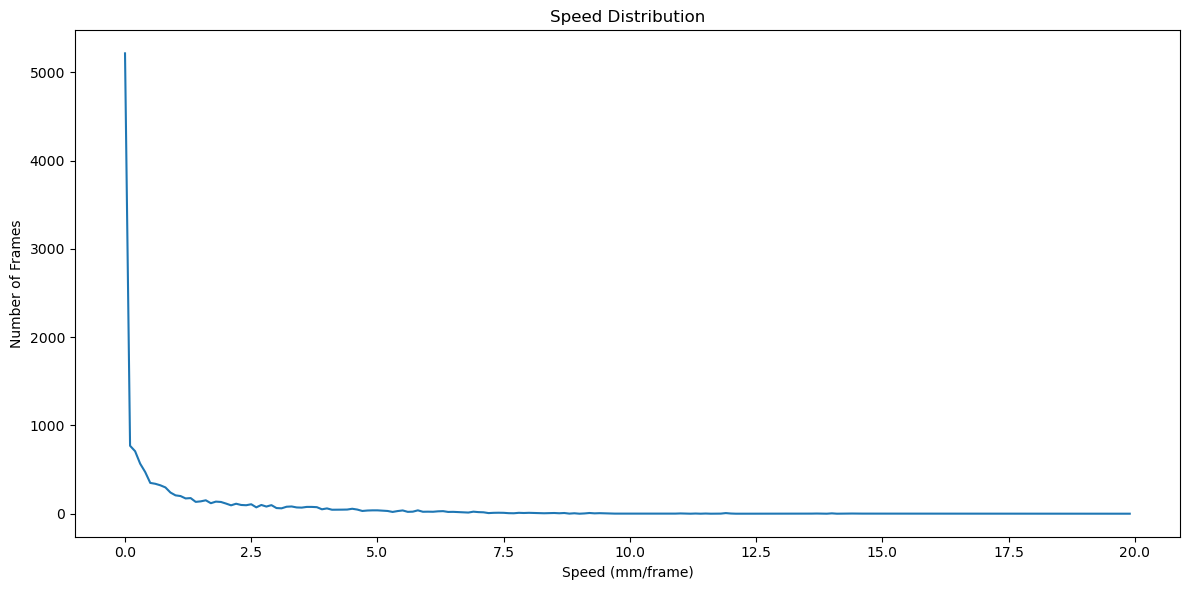

Analysis complete. Plots saved to: /data/big_rim/rsync_dcc_sum/25juneon/2025_06_24/20250519PMCL23L2_enewcone_econe_oldecone/COM/predict00/vis


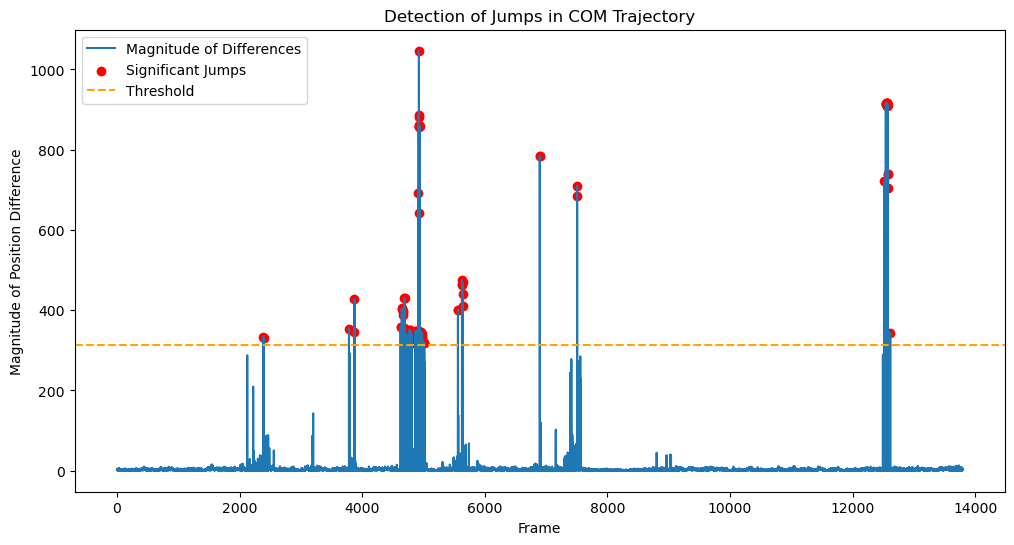

saved into npy. Frames with significant jumps: [ 2384  2392  3784  3867  3874  4625  4626  4645  4646  4663  4666  4669
  4675  4676  4677  4685  4689  4690  4717  4718  4751  4752  4765  4767
  4768  4769  4771  4773  4774  4783  4785  4787  4796  4797  4799  4800
  4802  4805  4868  4869  4872  4873  4879  4881  4884  4885  4886  4901
  4902  4904  4905  4907  4909  4917  4921  4922  4923  4924  4925  4926
  4931  4933  4934  4935  4966  4970  4973  4975  4980  4982  4983  5007
  5009  5011  5561  5562  5627  5628  5629  5637  5638  5642  6896  6897
  7506  7507 12514 12543 12545 12546 12547 12550 12554 12555 12557 12558
 12561 12563 12564 12567 12568 12569 12572 12574 12575 12576 12615]
107
N_FRAMES 107
pred_2d 107


100%|██████████| 107/107 [00:20<00:00,  5.23it/s]


/data/big_rim/rsync_dcc_sum/25juneon/2025_06_24/20250519PMCL23L2_enewcone
plotting com_traga for /data/big_rim/rsync_dcc_sum/25juneon/2025_06_24/20250519PMCL23L2_enewcone


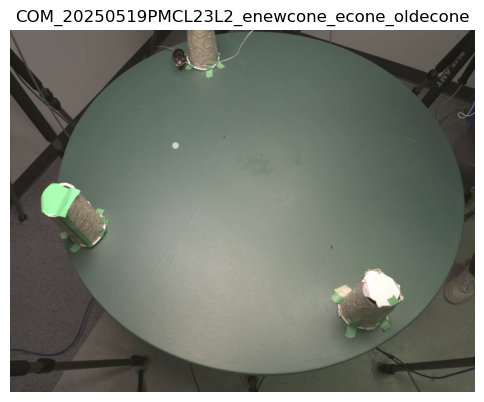

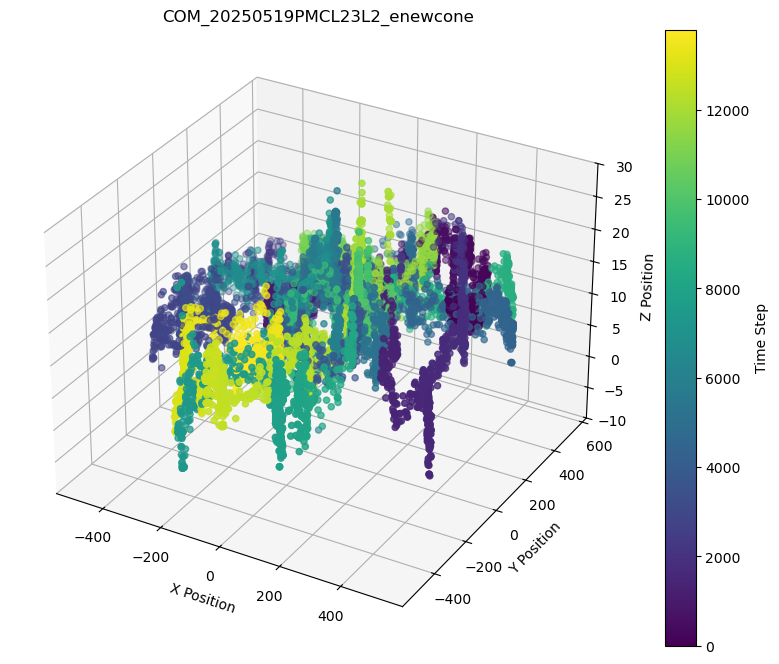

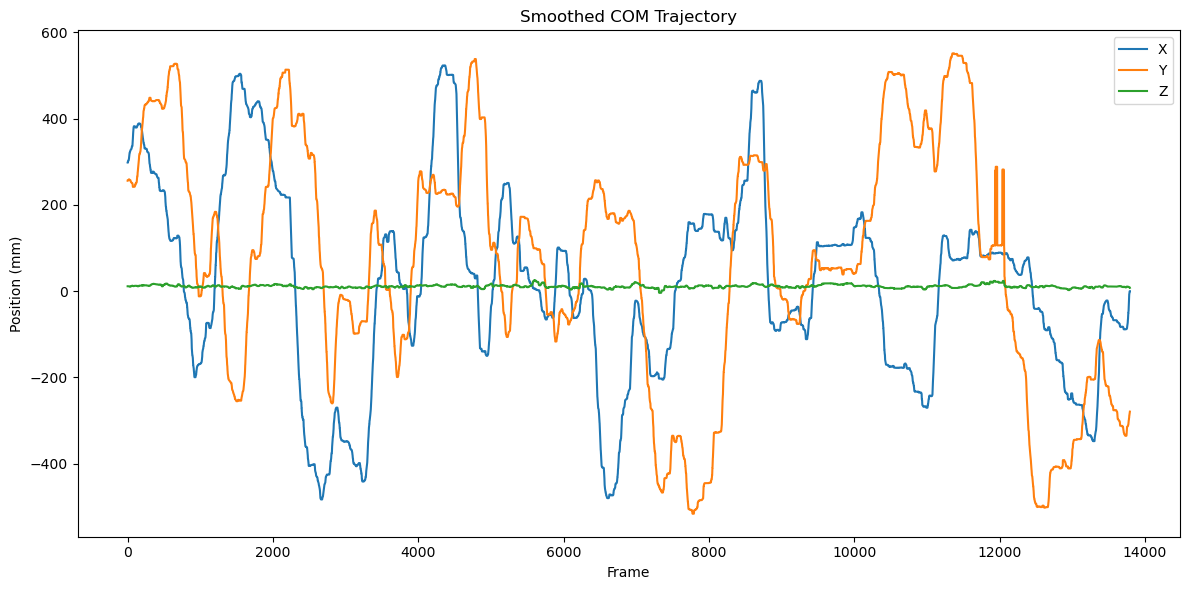

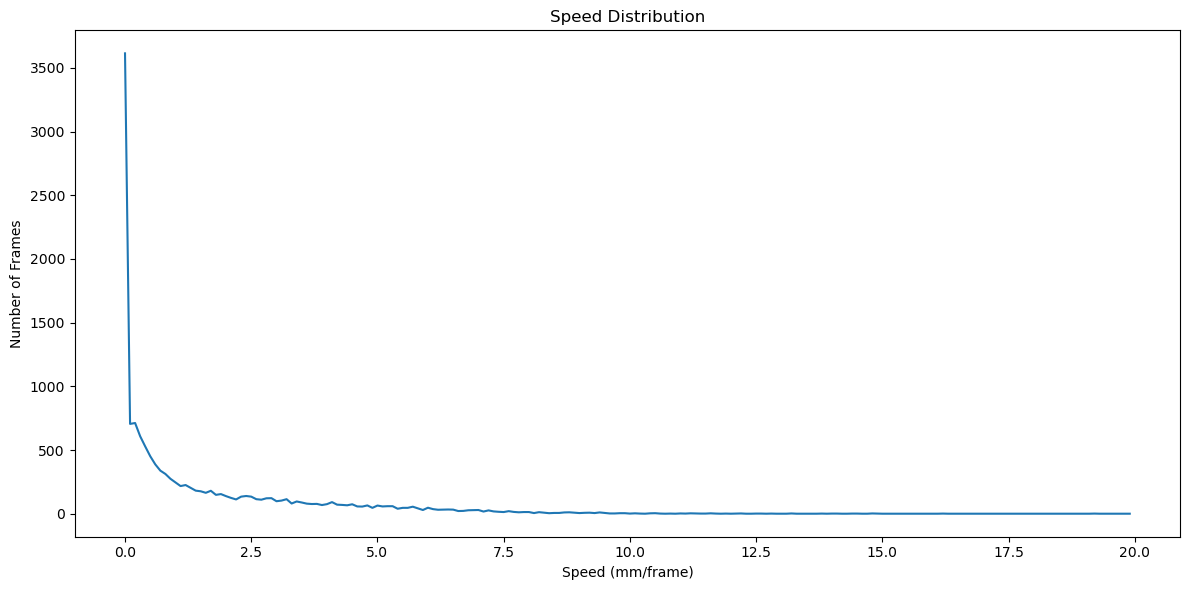

Analysis complete. Plots saved to: /data/big_rim/rsync_dcc_sum/25juneon/2025_06_24/20250519PMCL23L2_enewcone/COM/predict00/vis


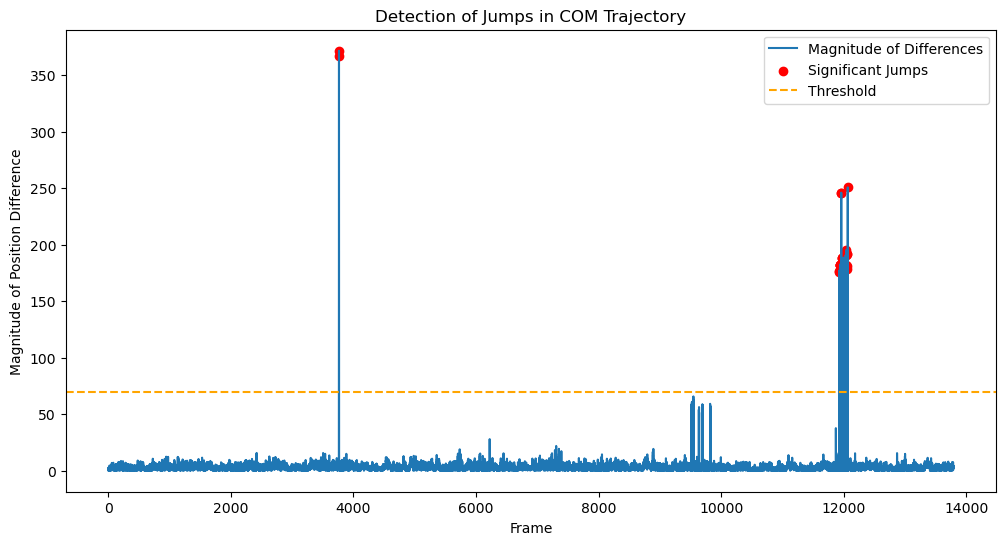

saved into npy. Frames with significant jumps: [ 3764  3765 11923 11928 11936 11937 11938 11939 11942 11951 11954 11957
 11958 11963 11964 11969 11977 11978 11982 11983 11989 11991 12009 12011
 12017 12018 12028 12029 12030 12031 12033 12041 12042 12044 12047 12057
 12059 12064]
38
N_FRAMES 38
pred_2d 38


100%|██████████| 38/38 [00:06<00:00,  6.12it/s]


/data/big_rim/rsync_dcc_sum/25juneon/2025_06_25/20250407v1l23_socialclearcup
plotting com_traga for /data/big_rim/rsync_dcc_sum/25juneon/2025_06_25/20250407v1l23_socialclearcup


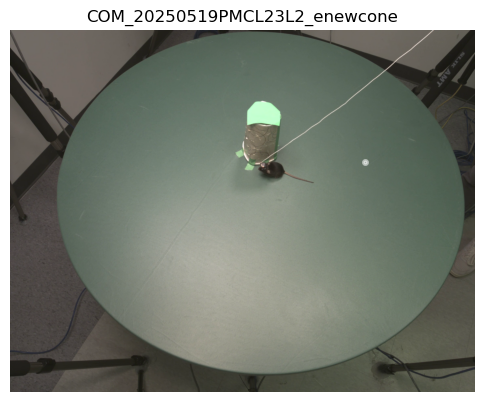

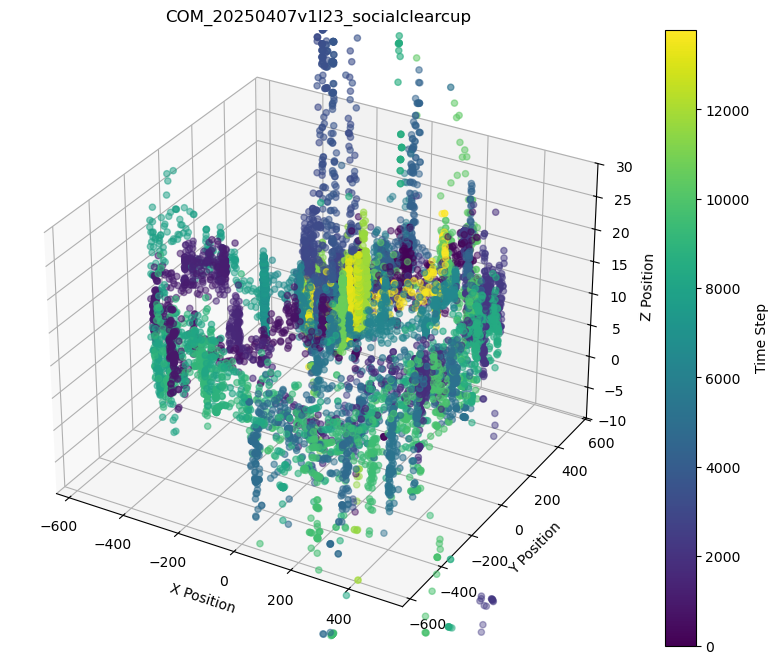

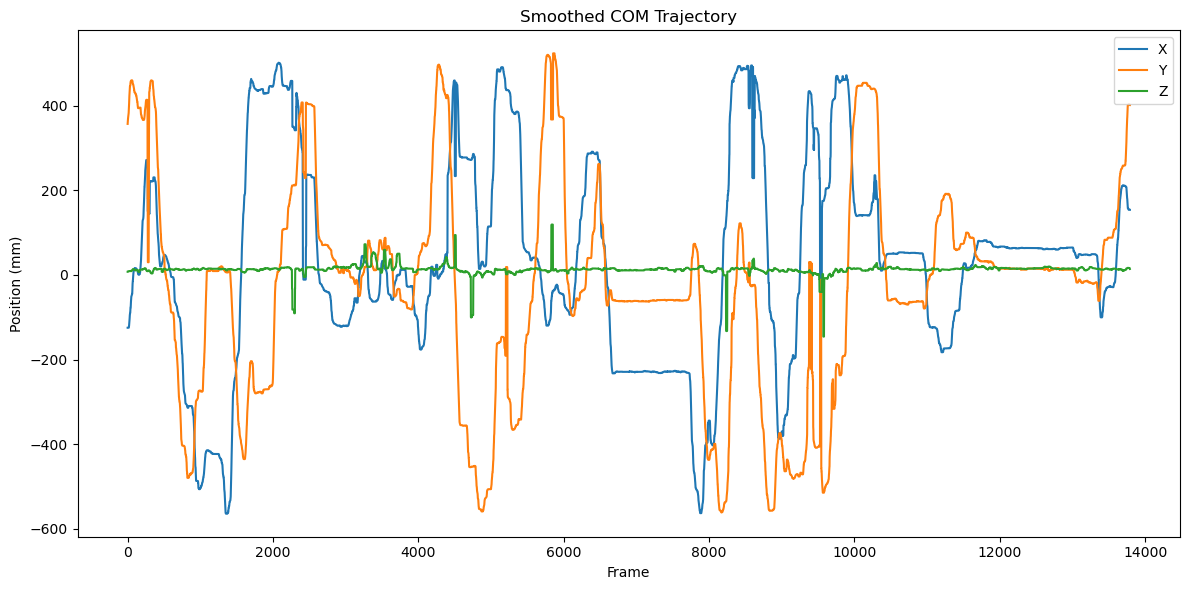

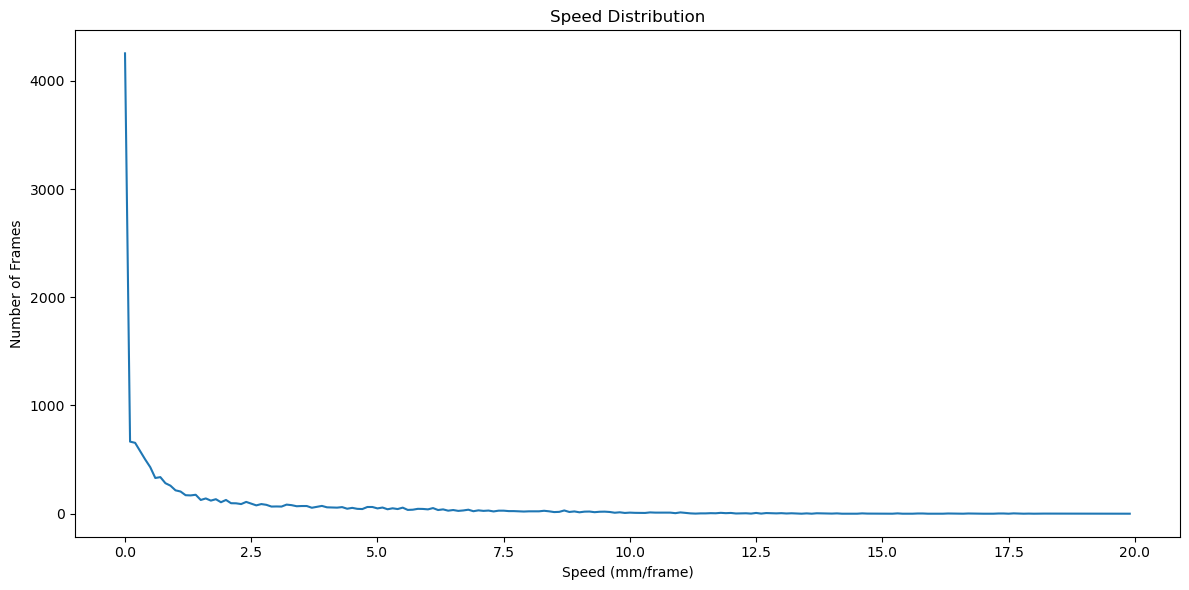

Analysis complete. Plots saved to: /data/big_rim/rsync_dcc_sum/25juneon/2025_06_25/20250407v1l23_socialclearcup/COM/predict00/vis


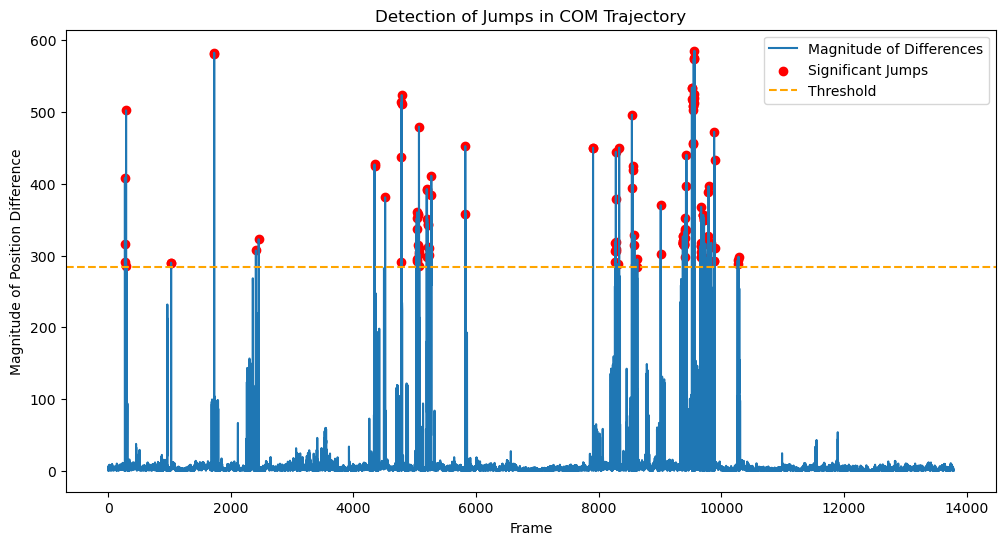

saved into npy. Frames with significant jumps: [  273   279   281   292   298  1026  1027  1728  1729  2409  2455  4344
  4345  4517  4780  4782  4783  4784  4788  5029  5032  5034  5036  5037
  5053  5054  5061  5062  5068  5069  5070  5073  5196  5200  5204  5205
  5211  5213  5224  5227  5231  5268  5270  5824  5827  7907  7908  8270
  8272  8274  8275  8276  8278  8279  8280  8318  8334  8542  8544  8554
  8556  8582  8583  8587  8623  8630  9012  9015  9372  9373  9376  9377
  9378  9379  9380  9382  9383  9388  9389  9390  9394  9396  9402  9403
  9407  9409  9413  9424  9428  9431  9519  9520  9521  9531  9535  9536
  9537  9540  9541  9546  9548  9549  9550  9551  9561  9562  9661  9662
  9663  9666  9667  9671  9673  9704  9705  9706  9713  9714  9715  9718
  9740  9743  9786  9791  9792  9836  9883  9887  9888  9890  9892 10265
 10266 10281]
134
N_FRAMES 134
pred_2d 134


100%|██████████| 134/134 [00:31<00:00,  4.22it/s]


/data/big_rim/rsync_dcc_sum/25juneon/2025_06_25/20250407v1l23_socialblackcup_2
plotting com_traga for /data/big_rim/rsync_dcc_sum/25juneon/2025_06_25/20250407v1l23_socialblackcup_2


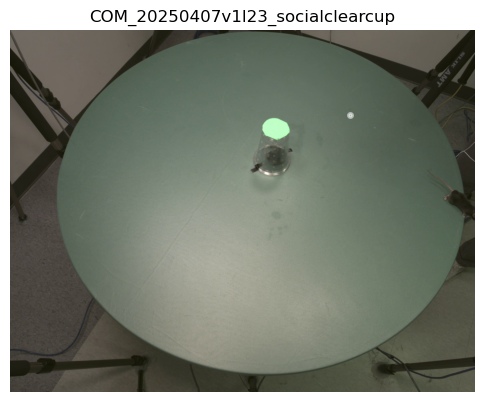

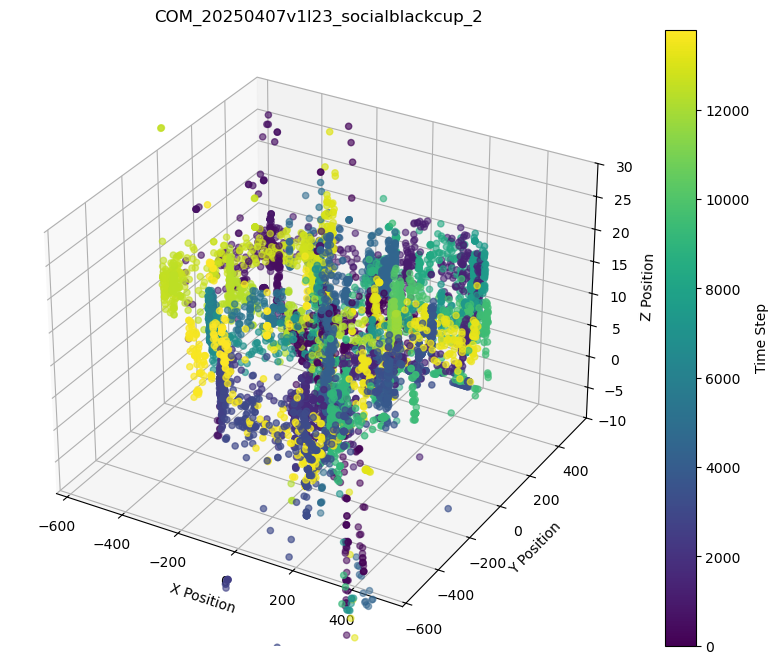

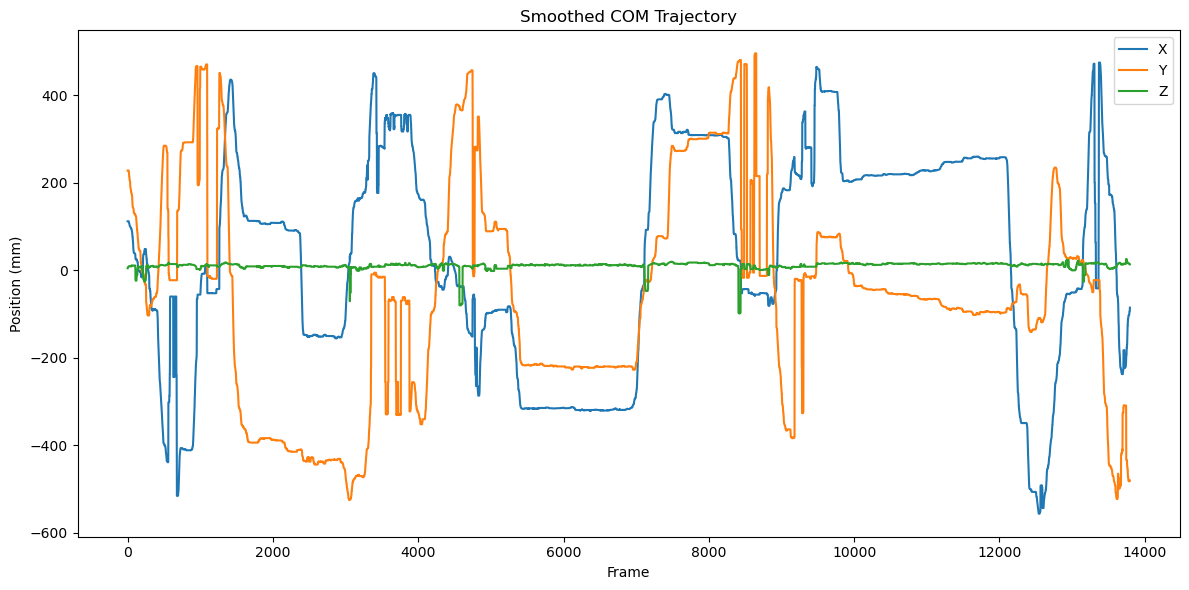

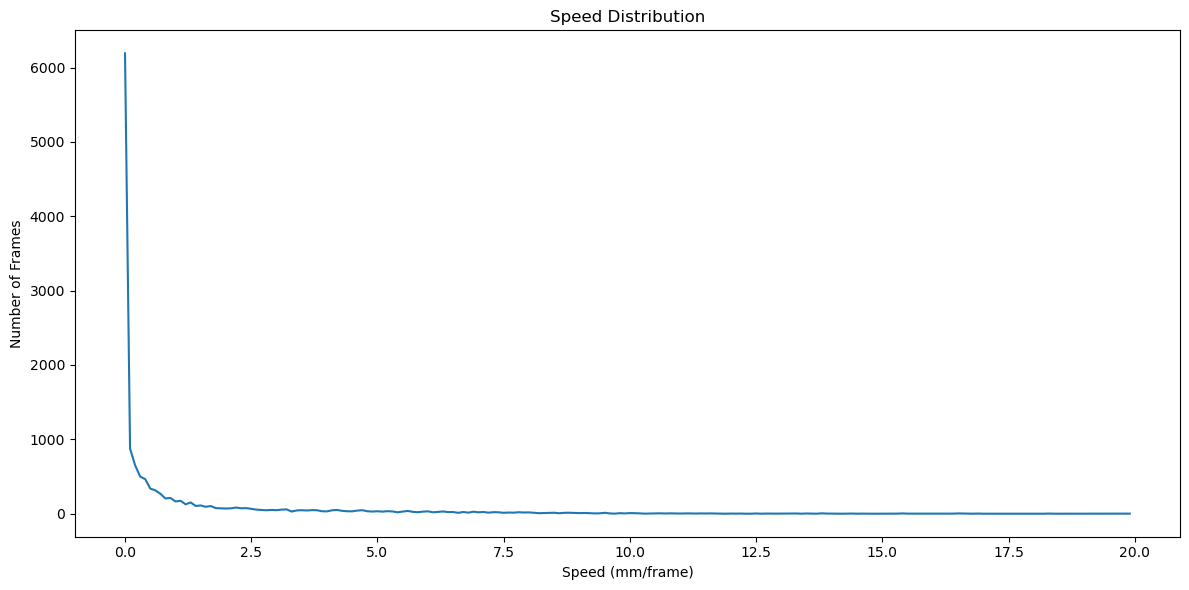

Analysis complete. Plots saved to: /data/big_rim/rsync_dcc_sum/25juneon/2025_06_25/20250407v1l23_socialblackcup_2/COM/predict00/vis


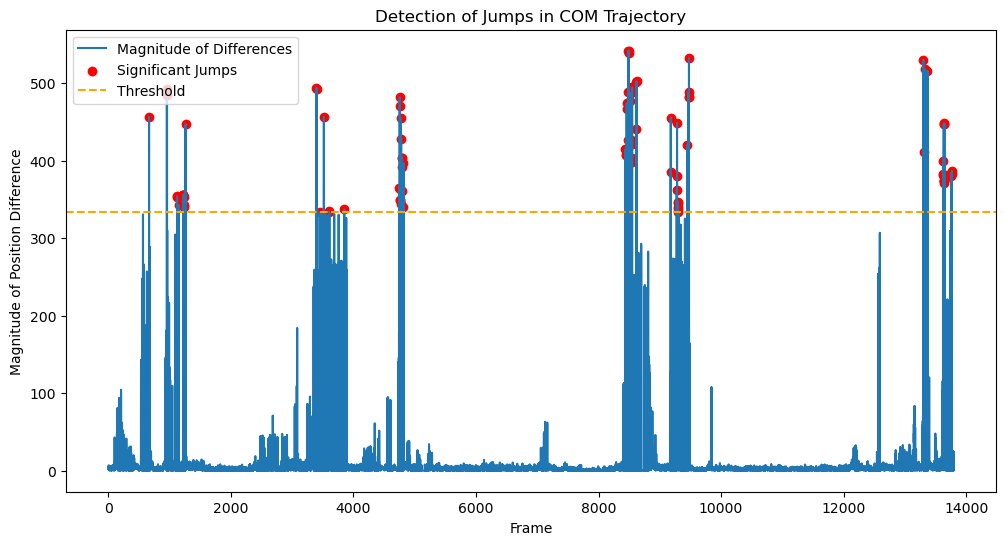

saved into npy. Frames with significant jumps: [  667   958   960  1123  1124  1148  1222  1224  1226  1228  1232  1233
  1234  1262  3397  3400  3450  3519  3604  3605  3852  4748  4755  4756
  4765  4766  4772  4775  4780  4781  4787  4789  4792  4793  4812  4818
  8440  8443  8444  8458  8459  8482  8487  8488  8491  8493  8520  8521
  8523  8528  8529  8542  8544  8546  8547  8548  8549  8617  8619  8620
  9179  9181  9276  9281  9282  9295  9296  9297  9298  9305  9449  9469
  9472  9473  9476 13300 13315 13319 13367 13626 13627 13628 13629 13630
 13631 13632 13633 13637 13643 13644 13757 13758 13761 13766]
94
N_FRAMES 94
pred_2d 94


100%|██████████| 94/94 [00:24<00:00,  3.87it/s]


/data/big_rim/rsync_dcc_sum/25juneon/2025_06_25/20250407v1l23_socialblackcup
plotting com_traga for /data/big_rim/rsync_dcc_sum/25juneon/2025_06_25/20250407v1l23_socialblackcup


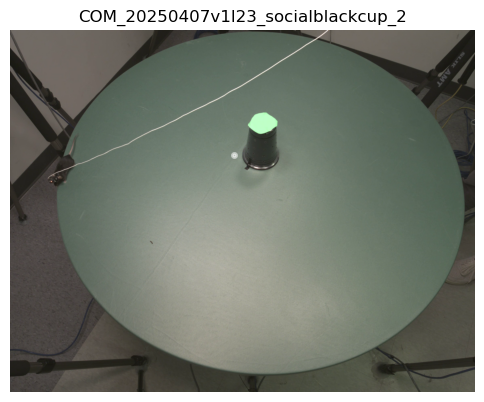

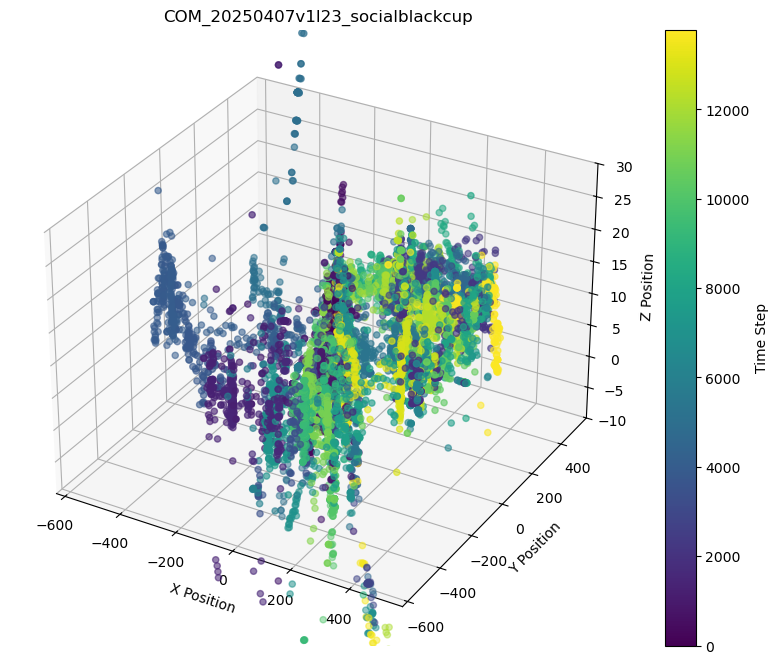

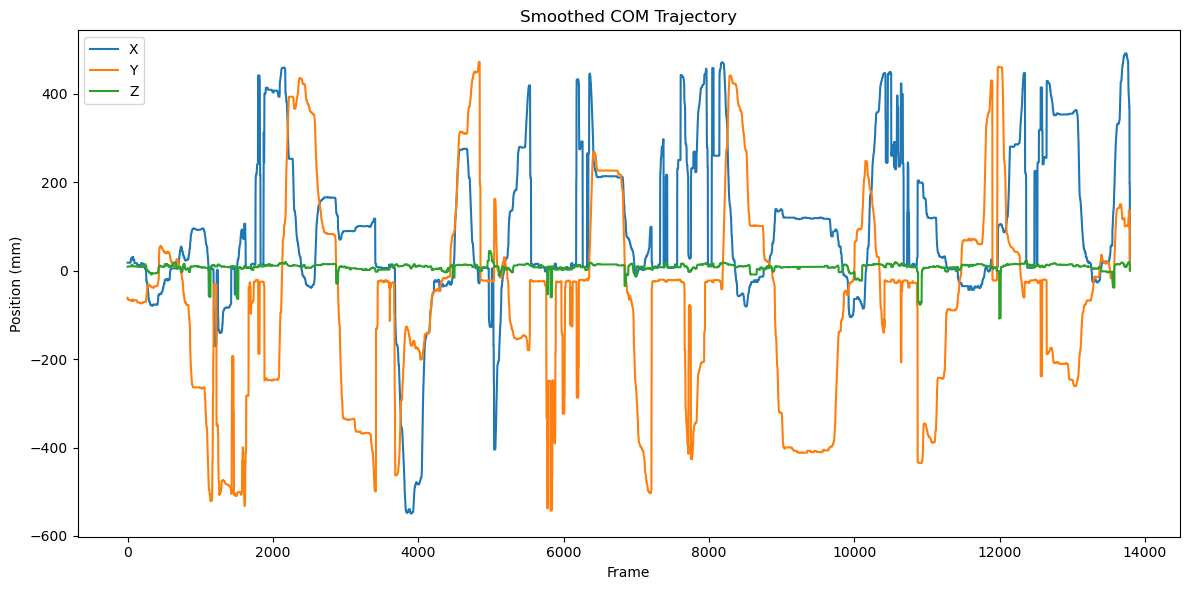

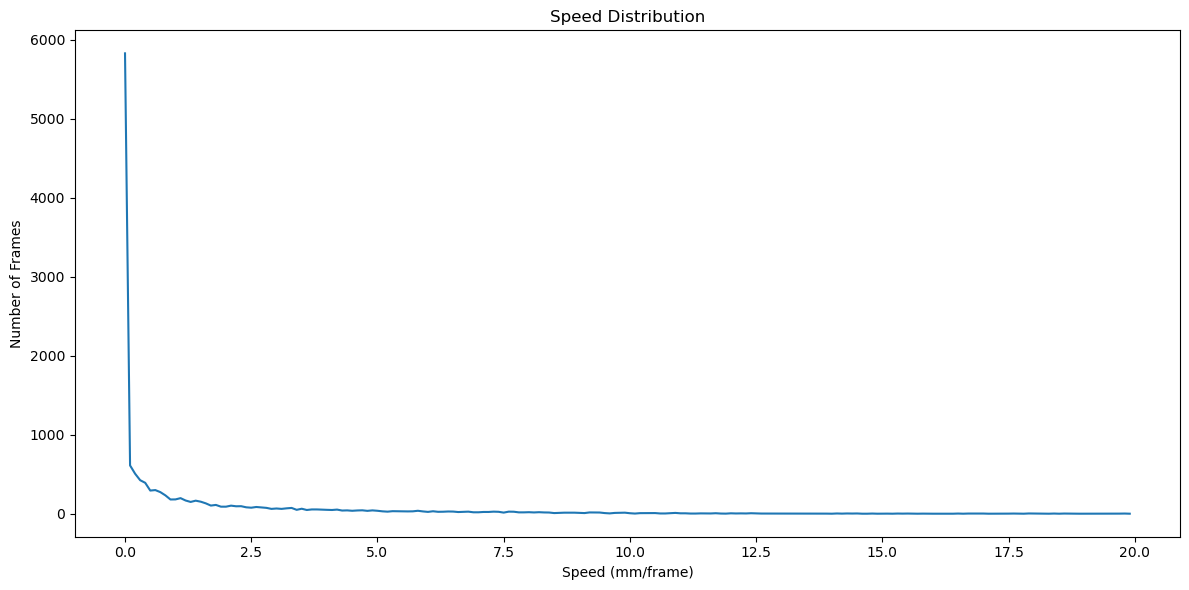

Analysis complete. Plots saved to: /data/big_rim/rsync_dcc_sum/25juneon/2025_06_25/20250407v1l23_socialblackcup/COM/predict00/vis


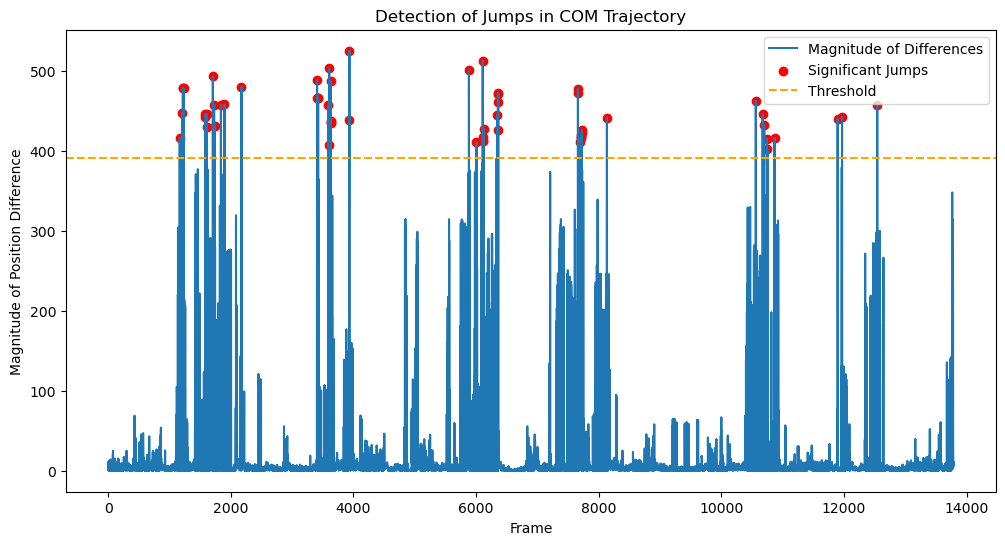

saved into npy. Frames with significant jumps: [ 1167  1210  1218  1227  1229  1584  1585  1609  1610  1707  1728  1735
  1839  1897  2174  3407  3408  3424  3425  3592  3605  3607  3628  3629
  3630  3634  3934  3935  5884  6007  6109  6117  6118  6119  6128  6345
  6355  6357  6362  6363  7661  7662  7703  7705  7708  7718  7723  7726
  8135 10563 10675 10701 10746 10753 10869 11898 11970 12544]
58
N_FRAMES 58
pred_2d 58


100%|██████████| 58/58 [00:24<00:00,  2.38it/s]


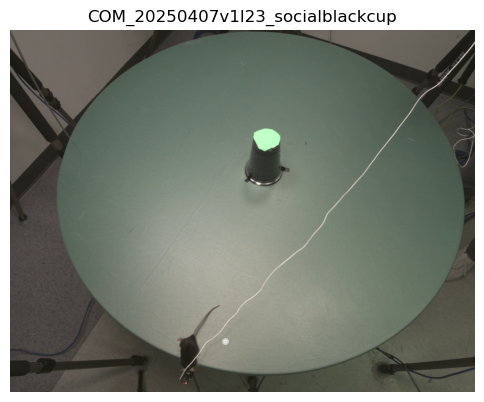

In [ ]:
# single com vis

from utlis.vis_valid_utlis.com_trag_updated import plot_com_all

# Assume base_folder is defined elsewhere in your script
# base_folder = '/path/to/your/base/folder'
for_com_vis = filtered_table
records = [
    {
        'date_folder': date_folder.as_py(),  # Convert to string using as_py()
        'rec_file': rec_file.as_py()         # Convert to string using as_py()
    }
    for date_folder, rec_file in zip(for_com_vis['date_folder'], for_com_vis['rec_file'])
]

# Iterate through the records and process each one sequentially
for record in records:
    base_path = f"{base_folder}/{record['date_folder']}/{record['rec_file']}"
    print(base_path)
    plot_com_all(base_path,perform_jump_indices=True, perform_video_generation=True) #com_folder_name='COM/predict00', perform_jump_indices=True, perform_video_generation=False, perform_generate_com_video=False


In [ ]:
# social com vis

# from utlis.vis_valid_utlis.com_trag_updated import plot_com_all
from utlis.vis_valid_utlis.scom_traga_utlis import plot_com_all_social

# Assume base_folder is defined elsewhere in your script
# base_folder = '/path/to/your/base/folder'
for_com_vis = filtered_table
records = [
    {
        'date_folder': date_folder.as_py(),  # Convert to string using as_py()
        'rec_file': rec_file.as_py()         # Convert to string using as_py()
    }
    for date_folder, rec_file in zip(for_com_vis['date_folder'], for_com_vis['rec_file'])
]

# Iterate through the records and process each one sequentially
for record in records:
    base_path = f"{base_folder}/{record['date_folder']}/{record['rec_file']}"
    print(base_path)
    plot_com_all_social(base_path) #com_folder_name='COM/predict00', perform_jump_indices=True, perform_video_generation=False, perform_generate_com_video=False


/data/big_rim/rsync_dcc_sum/25juneon/2025_06_24/20250519PMCL23L2_enewcone_econe_oldecone/data/big_rim/rsync_dcc_sum/25juneon/2025_06_24/20250519PMCL23L2_enewcone/data/big_rim/rsync_dcc_sum/25juneon/2025_06_25/20250407v1l23_socialclearcup/data/big_rim/rsync_dcc_sum/25juneon/2025_06_25/20250407v1l23_socialblackcup_2/data/big_rim/rsync_dcc_sum/25juneon/2025_06_25/20250407v1l23_socialblackcup




Plot saved as '/data/big_rim/rsync_dcc_sum/25juneon/2025_06_25/20250407v1l23_socialblackcup_2/DANNCE/predict00/vis/2025_06_25_20250407v1l23_socialblackcup_2.jpg'.
Plot saved as '/data/big_rim/rsync_dcc_sum/25juneon/2025_06_24/20250519PMCL23L2_enewcone/DANNCE/predict00/vis/2025_06_24_20250519PMCL23L2_enewcone.jpg'.
Plot saved as '/data/big_rim/rsync_dcc_sum/25juneon/2025_06_24/20250519PMCL23L2_enewcone_econe_oldecone/DANNCE/predict00/vis/2025_06_24_20250519PMCL23L2_enewcone_econe_oldecone.jpg'.
Plot saved as '/data/big_rim/rsync_dcc_sum/25juneon/2025_06_25/20250407v1l23_socialclearcup/DANNCE/predic

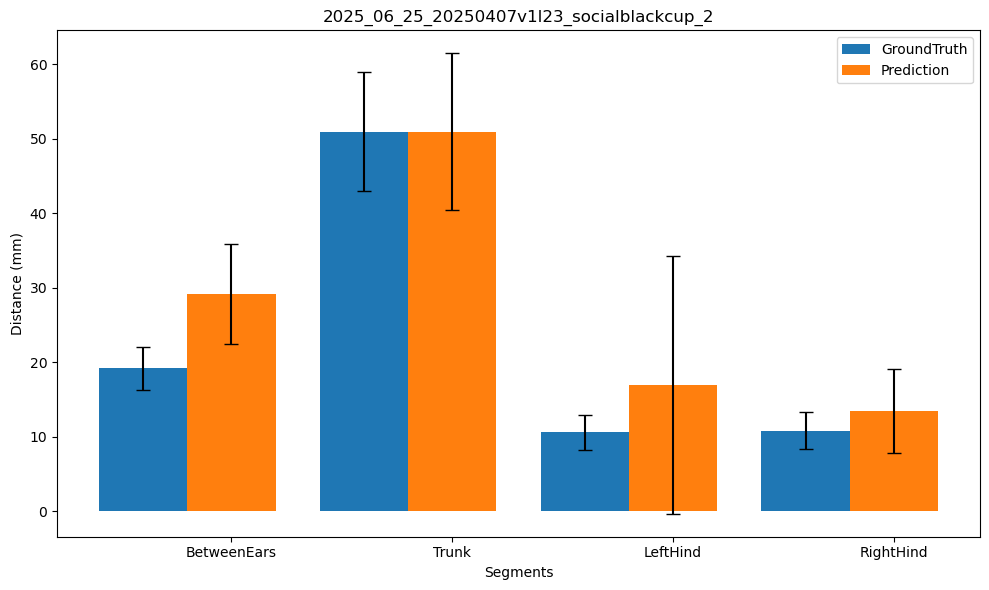

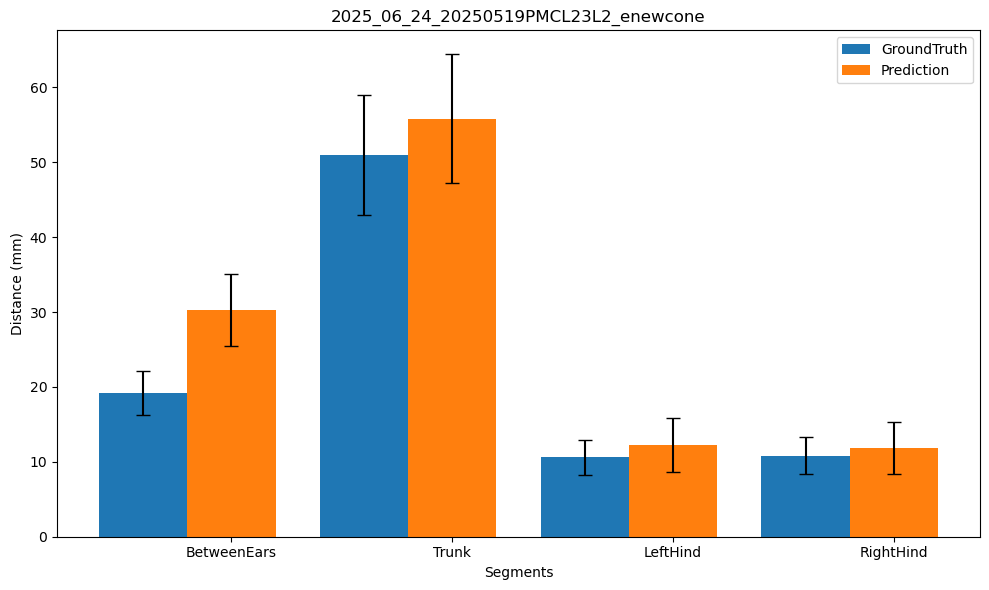

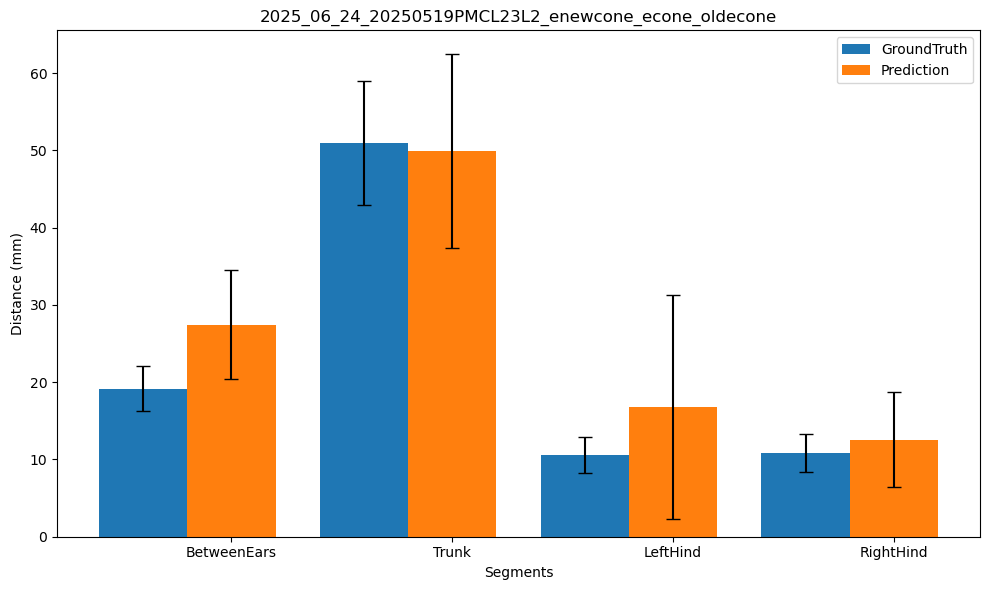

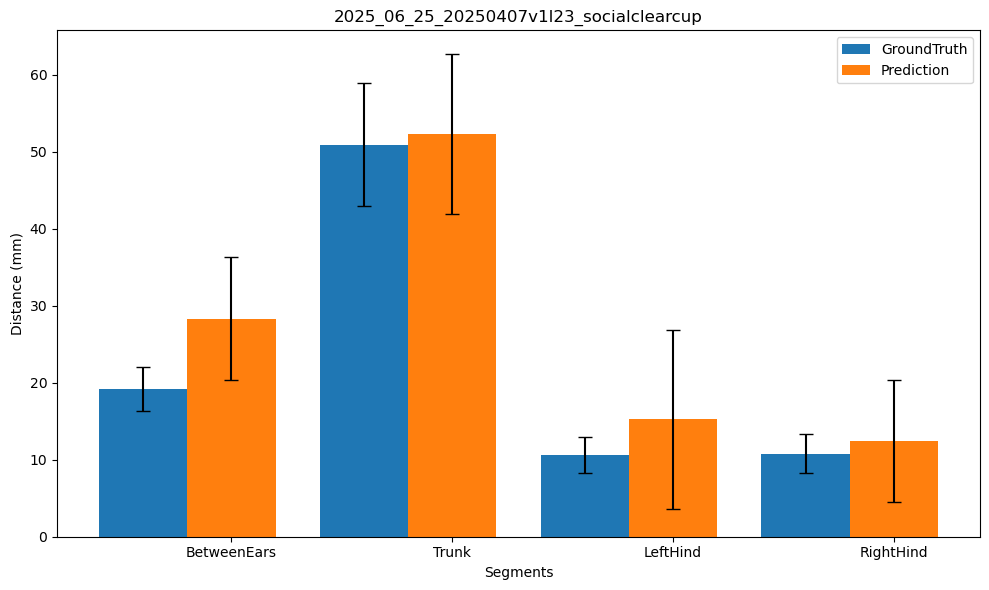

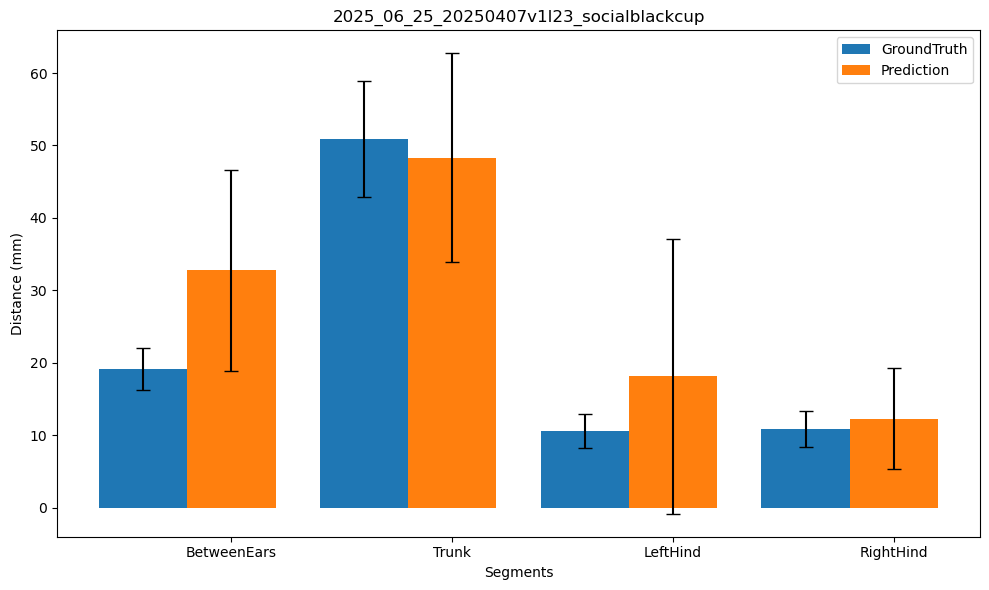

In [7]:
# single dannce valid


from useful_files.sophie_check_dannce_mir_modif import dannce_valid

for_dannce_vis = filtered_table


records = [
    {
        'date_folder': date_folder.as_py(),  # Convert to string using as_py()
        'rec_file': rec_file.as_py()         # Convert to string using as_py()
    }
    for date_folder, rec_file in zip(for_dannce_vis['date_folder'], for_dannce_vis['rec_file'])
]

# Iterate through the records and process each one sequentially
# for record in records:
#     base_path = f"{base_folder}/{record['date_folder']}/{record['rec_file']}"
#     print(base_path)
#     try:
#         dannce_valid(base_path) #com_folder_name='COM/predict00', perform_jump_indices=True, perform_video_generation=False, perform_generate_com_video=False
#     except Exception as e:
#         print(f" An error occurred while processing {base_path}: {e}")
#         # Skip to the next record if an error occurs
#         continue

# #trying for parallel processing again:
from concurrent.futures import ProcessPoolExecutor, as_completed

def process_record(record):
    base_path = f"{base_folder}/{record['date_folder']}/{record['rec_file']}"
    print(base_path)
    try:
        dannce_valid(base_path)
    except Exception as e:
        print(f"An error occurred while processing {base_path}: {e}")
        # Skip to the next record if an error occurs
        pass

with ProcessPoolExecutor() as executor:
    futures = [executor.submit(process_record, record) for record in records]
    for future in as_completed(futures):
        pass  # You can retrieve results or handle exceptions here if needed
